In [76]:
# IMPORTS
from IPython.display import Image
import numpy as np
import pandas as pd

from random import randint

class Gen:
    def __init__(self,val):
        self.value = val
        self.bin =  bin(self.value)[2:].zfill(8) 
        self.cnt = 1
        self.adaptation = 2* (self.value*self.value +1) # ocena przystosowania
    def printBin(self):
        return bin(self.value)[2:].zfill(8) 
    def printAllInfo(self):
        return str("0b"+self.printBin()+" ("+str(self.value)+") cnt="+ str(self.cnt) + " adaptation: "+str(self.adaptation))



In [77]:
def tryMute(gen):
    probably = 25 # @PARAM
    genAsList = list(gen)
    if randint(0,100) < probably:
        print("Mutacja!!!!!!")
        locusMute = randint(0,7)
        if genAsList[locusMute]== '1':
            genAsList[locusMute]= '0'
        else:
            genAsList[locusMute]= '1'
    return str(genAsList)
        
def cross(genX, genY):
    locus = randint(0,7)
    genX1 = str(genX.printBin())
    genY1 = str(genY.printBin())
    print("X1:" + genX1 + " Y1:" + genY1 + " loc:" + str(locus))
    genX2 = genX1[:locus] + genY1[locus:]
    genY2 = genY1[:locus] + genX1[locus:]
    print(genX1)
    print(genY1)
    print(genX2)
    print(genY2)
    tryMute(genX2)
    tryMute(genY2)
    print(genX2)
    print(genY2)
    genXnew = Gen(int(genX2, 2))
    genYnew = Gen(int(genY2, 2))
    return [genXnew, genYnew]


In [78]:

# ZZ = cross(Gen(4),Gen(99))


# print("_____")
# print(ZZ[0].printBin())
# print(ZZ[1].printBin())

# print(ZZ[0].value)
# print(ZZ[1].value)

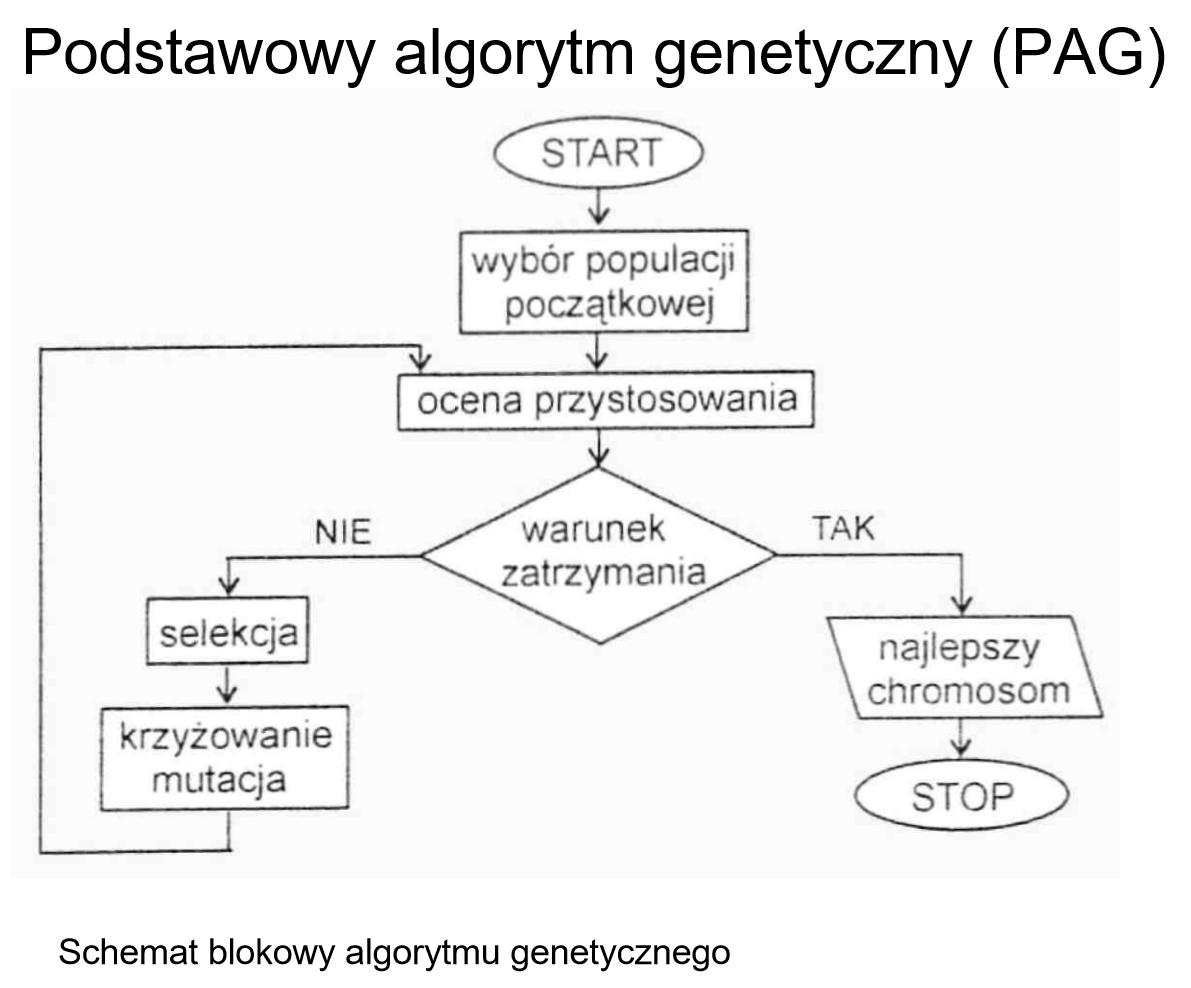

In [79]:
Image("img/PAG-schemat.PNG")

## 1. WYBÓR POPULACJI POCZĄTKOWEJ
#### -Populacja składa się z n punktów przestrzeni poszukiwań X (funkcja rand)
### f(x) = 2(x^2+1), gdzie x E <1...127>

In [80]:
populationCnt = 100 #rozmiar populacji  # @PARAM
M = np.zeros(populationCnt).astype(int)
xMin = 1
xMax = 127  # @PARAM
for x in range(populationCnt):
    M[x] = randint(xMin,xMax)
    #2*(randint(xMin,xMax)+1)
print(M)

print("\nPOSORTOWANE:")
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

M = selection_sort(M)
print(M)

[ 81  64 112  97  79  43  17  90  73  27   2  11 105 110 123 114  94  80
  73  38 120 118  51 123  50  35  48 119  33  19  22  60  25  65  66  30
   8  81  13  24 124 105  45  98  40  76 116  60 125  21  21 114 103   9
 119 106 100  52  50 111 102 121  46  12  90  25 107  90 110  17 126 124
  40  50  40   2 111  12  75  72  38  62  25  93 104  41  20  87 109 110
  65  48 119 127  35   1 102  78  26  84]

POSORTOWANE:
[  1   2   2   8   9  11  12  12  13  17  17  19  20  21  21  22  24  25
  25  25  26  27  30  33  35  35  38  38  40  40  40  41  43  45  46  48
  48  50  50  50  51  52  60  60  62  64  65  65  66  72  73  73  75  76
  78  79  80  81  81  84  87  90  90  90  93  94  97  98 100 102 102 103
 104 105 105 106 107 109 110 110 110 111 111 112 114 114 116 118 119 119
 119 120 121 123 123 124 124 125 126 127]


In [81]:
print("array(1,100) to list/ collection(T:Gen), count unical Gen, count genotypeSum ")
genotypeSum = 0

t_genList = []
t_genList.append(Gen(0))
for i in M:
    if i == t_genList[-1].value:
        t_genList[-1].cnt = t_genList[-1].cnt + 1
    else:
        t_genList.append(Gen(i))
        genotypeSum = genotypeSum + Gen(i).adaptation
del t_genList[0]
        
genGroup = t_genList

genotypeCnt = len(genGroup)
print("genotypeCnt = " + str(genotypeCnt))
print("genotypeSum = " + str(genotypeSum))


array(1,100) to list/ collection(T:Gen), count unical Gen, count genotypeSum 
genotypeCnt = 71
genotypeSum = 883832


object list to json, json to pandas, add % column
               Bin  Dec   Gain   part(%)  minLos  maxLos
00000001  00000001    1      4  0.000005       0       4
00000010  00000010    2     10  0.000011       4      14
00001000  00001000    8    130  0.000147      14     144
00001001  00001001    9    164  0.000186     144     308
00001011  00001011   11    244  0.000276     308     552
00001100  00001100   12    290  0.000328     552     842
00001101  00001101   13    340  0.000385     842    1182
00010001  00010001   17    580  0.000656    1182    1762
00010011  00010011   19    724  0.000819    1762    2486
00010100  00010100   20    802  0.000907    2486    3288
00010101  00010101   21    884  0.001000    3288    4172
00010110  00010110   22    970  0.001097    4172    5142
00011000  00011000   24   1154  0.001306    5142    6296
00011001  00011001   25   1252  0.001417    6296    7548
00011010  00011010   26   1354  0.001532    7548    8902
00011011  00011011   27   1460  0.0016

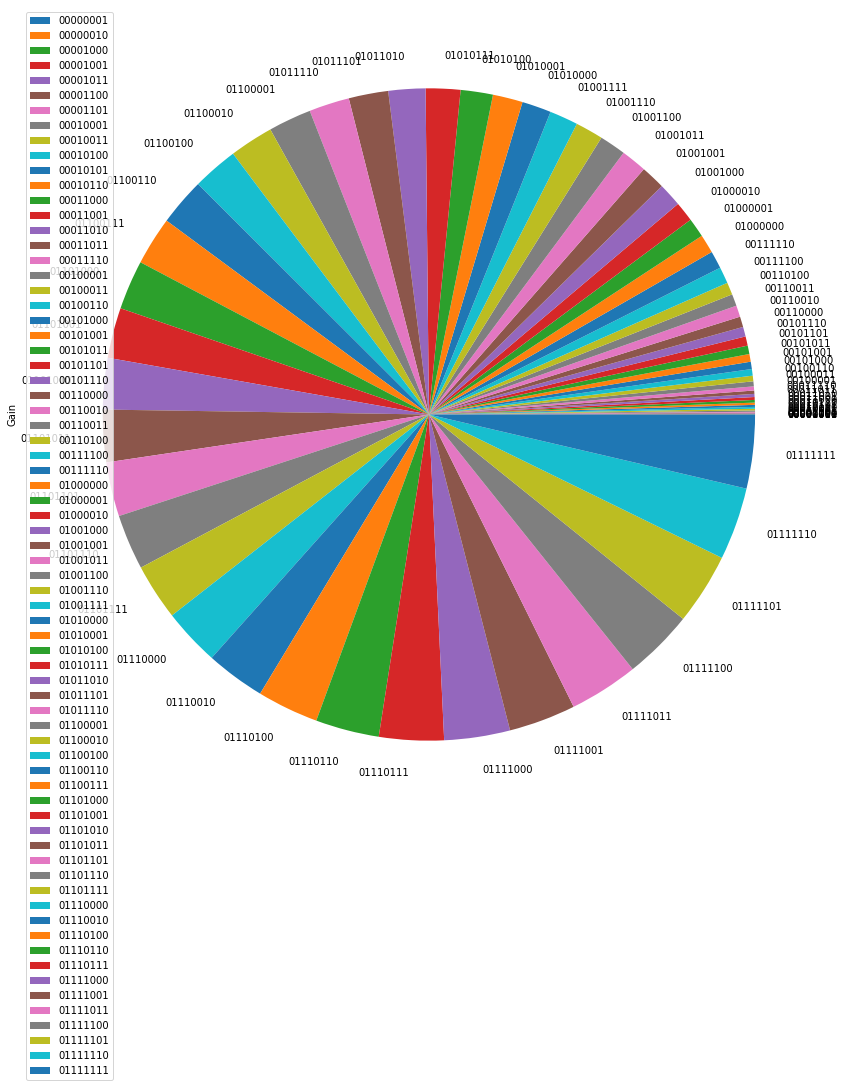

In [82]:
print("object list to json, json to pandas, add % column")
data = {}
losL = 0
losH = 0
for i in range(genotypeCnt):
    losH = losL+genGroup[i].adaptation
    data[genGroup[i].printBin()]= [genGroup[i].printBin(),genGroup[i].value, genGroup[i].adaptation,genGroup[i].adaptation/genotypeSum,losL,losH]
    losL = losH

    a = pd.DataFrame.from_dict(data,columns = ['Bin', 'Dec', 'Gain', 'part(%)','minLos','maxLos'], orient='index') 

for index, row in a.iterrows():
    row.values[3]=(row.values[2]/genotypeSum )
plot = a.plot.pie(y='Gain', figsize=(15, 15)) #, labels='Bin')
# plot.show()
print(a)

## 2. Select new genothypes
Kołem ruletki kręcimy tyle razy, ile jest chromosomów w populacji. Z każdego losowania do następnego pokolenia wybrany zostanie ten chromosom, przy którym zatrzymało się koło ruletki. 

In [83]:
numpy_matrix = a.as_matrix()
# print(numpy_matrix)
M1 = np.zeros(populationCnt).astype(int)


for i in range(populationCnt):
    wylosowane = randint(0,genotypeSum)
    j=0
    while wylosowane > numpy_matrix[j,5]:  # dopóki wiekśze od max
        j = j + 1
#     print(numpy_matrix[j,:]) 
    M1[i]=numpy_matrix[j,1]
#     print(numpy_matrix[j,1])
# M1
#M1 = selection_sort(M1)
print(M1)
print(selection_sort(M1))

M2 = np.zeros(populationCnt).astype(int)



for k in range(int(populationCnt/2)):
    twoChromosome = cross(Gen(k),Gen(2*k))
#     tempZZ = cross(Gen(4),Gen(99))
    M2[k] = twoChromosome[0].value    
    M2[2*k] = twoChromosome[1].value

print(M2)

# print("_____")
# print(ZZ[0].printBin())
# print(ZZ[1].printBin())

# print(ZZ[0].value)
# print(ZZ[1].value)
    

[102 116 124  87  80  78 107  78 109  98 121  90 114 126 118  87 127 126
 106 111 121 110  84 103 126  21 114  80  93  66 107 102  72 125 125 111
 121 125  90 107  80 107 104 105  94 123 124  78  80  45 104 125 119 120
 127 105  98 123 110 107 111 105  98  90 107 102 126 126 123 126 120  97
  87 120 123  50 114 110  21  81 106 118 125  65  80 126  90 123  72 121
  98  50  98 126 107 114 127 121 121 107]
[ 21  21  45  50  50  65  66  72  72  78  78  78  80  80  80  80  80  81
  84  87  87  87  90  90  90  90  93  94  97  98  98  98  98  98 102 102
 102 103 104 104 105 105 105 106 106 107 107 107 107 107 107 107 107 109
 110 110 110 111 111 111 114 114 114 114 116 118 118 119 120 120 120 121
 121 121 121 121 121 123 123 123 123 123 124 124 125 125 125 125 125 126
 126 126 126 126 126 126 126 127 127 127]
X1:00000000 Y1:00000000 loc:7
00000000
00000000
00000000
00000000
00000000
00000000
X1:00000001 Y1:00000010 loc:4
00000001
00000010
00000010
00000001
00000010
00000001
X1:00000010 Y1:000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
